# Mental Health Risk Assessment

Mental health is deeply personal, and challenges often appear gradually through changes in mood, stress, habits, or social engagement. This project explores survey data capturing these experiences to uncover patterns that may reflect different mental health profiles. By examining factors such as stress perception, coping strategies, and work or social engagement, the goal is to better understand how these indicators naturally cluster and relate to one another in the population.

The purpose of this work is not clinical diagnosis, but exploratory insight. The findings aim to support research, raise awareness, and provide data-driven perspectives to help healthcare professionals, policymakers, and organizations recognize potential mental health risk indicators. Importantly, this assessment is **not a substitute for professional evaluation**, and individuals should consult qualified experts for any personal mental health concerns.

In [20]:
# --------------------
# Import Libraries
# --------------------
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

## Reading The Data
-------------------------------------------

The dataset is contained in a single CSV file named 'Mental Health Dataset.csv'. The dataset used in this study is publicly available on Kaggle:
https://www.kaggle.com/datasets/bhavikjikadara/mental-health-dataset


In [5]:
data = pd.read_csv('../data/raw/Mental Health Dataset.csv')

## Exploring The Data
-------------------------------------------

Before diving into detailed analysis, it is important to gain a solid understanding of the dataset’s overall structure and quality. We begin by examining basic information such as the number of rows and columns, the datatypes of each feature, and the presence of missing values. This allows us to understand the scope of the data and any immediate limitations.

Next, we will inspect samples of the dataset to get a general sense of its contents, followed by statistical exploration. For numerical features, we will review measures such as mean, maximum, minimum, and standard deviation, while for categorical features we will examine frequencies and proportions. Finally, we will assess the cleanliness of the data to identify any issues, such as inconsistent labels or missing values that may require preprocessing before further analysis.

### EXPLORING THE STRUCTURE

In [6]:
# --------------------
# Dataset Information
# --------------------
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [ ]:
# --------------
# Dataset Head
# --------------
data.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [ ]:
# --------------
# Dataset Tail
# --------------
data.tail()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
292359,7/27/2015 23:25,Male,United States,Business,Yes,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,Maybe,Not sure
292360,8/17/2015 9:38,Male,South Africa,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
292361,8/25/2015 19:59,Male,United States,Business,No,Yes,No,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,No
292362,9/26/2015 1:07,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
292363,2/1/2016 23:04,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes


In [ ]:
# ---------------
# Dataset Sample
# ---------------
data.sample(5)

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
170739,8/27/2014 13:59,Male,United States,Corporate,No,No,Yes,15-30 days,Yes,No,Maybe,Medium,Yes,No,Yes,No,No
120246,8/27/2014 12:39,Male,United States,Corporate,No,Yes,Yes,More than 2 months,Yes,Maybe,Yes,Medium,Yes,Yes,Maybe,Maybe,Yes
265725,8/28/2014 17:01,Male,United States,Student,No,No,No,More than 2 months,No,Maybe,Maybe,High,Yes,Maybe,Yes,No,Yes
33718,8/28/2014 14:31,Female,United States,Student,No,No,No,More than 2 months,Yes,Maybe,Maybe,Low,Yes,Maybe,Yes,No,Not sure
188176,8/28/2014 10:42,Male,United Kingdom,Others,Yes,No,No,1-14 days,Yes,Yes,No,Low,Yes,No,Yes,No,Not sure


### EXPLORING THE STATISTICS

In [9]:
data.describe()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,292364,292364,292364,292364,287162,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364
unique,580,2,35,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,8/27/2014 11:43,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,2384,239850,171308,66351,257994,176832,147606,63548,99985,109523,104018,101064,154328,105843,103393,232166,118886


### EXPLORING THE CLEANNESS OF THE DATA

Before we can analyze the dataset, it is important to ensure it accurately reflects the experiences shared by respondents. We will examine the data cleanliness through three main aspects:

1. Duplicated Rows
2. Column Issues (e.g., data inconsistencies)
3.  Missing Values


First, we will check for duplicated rows to ensure each observation is unique. Next, we will investigate column issues, such as ambiguous column names, inconsistent datatypes, irregular values in categorical features, or columns that may be irrelevant for the analysis. Finally, we will examine missing values and aim to understand their nature: whether they are random or if their absence can be explained by other features, which could allow for informed reconstruction. This sets the plan for cleaning the dataset in the next phase.

---

#### Duplicated Rows

After checking for duplicated rows, we found that the dataset contains 2,313 duplicate entries. Identifying these duplicates is important to ensure that each participant’s response is unique and accurately represented in our analysis. These duplicate rows will be removed before further exploration to maintain the integrity of the dataset.

In [ ]:
data.duplicated().sum()

np.int64(2313)

#### Column Issues

Examining the dataset’s columns, we have:

['Timestamp', 'Gender', 'Country', 'Occupation', 'self_employed',
       'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress',
       'Changes_Habits', 'Mental_Health_History', 'Mood_Swings',
       'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
       'mental_health_interview', 'care_options']

Our first observation is that the `Timestamp` column does not provide useful information for our analysis and will be dropped later. The column names are somewhat inconsistent in format and, in some cases, vague or ambiguous. All feature datatypes are currently `object`, which is appropriate for the categorical nature of the data, so no changes are needed there. After inspecting the categorical values, we found them generally consistent; the only minor deviation is in `care_options`, where the value formatting differs from the title case used throughout the other categorical features.

In [8]:
# -------------
# Column Names
# -------------
data.columns

Index(['Timestamp', 'Gender', 'Country', 'Occupation', 'self_employed',
       'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress',
       'Changes_Habits', 'Mental_Health_History', 'Mood_Swings',
       'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
       'mental_health_interview', 'care_options'],
      dtype='object')

In [9]:
# -------------
# Column Types
# -------------
data.dtypes

Timestamp                  object
Gender                     object
Country                    object
Occupation                 object
self_employed              object
family_history             object
treatment                  object
Days_Indoors               object
Growing_Stress             object
Changes_Habits             object
Mental_Health_History      object
Mood_Swings                object
Coping_Struggles           object
Work_Interest              object
Social_Weakness            object
mental_health_interview    object
care_options               object
dtype: object

In [10]:
# ---------------------------------
# Column Values Inconsistency Check
# ----------------------------------

for column in data.select_dtypes(include='object').columns:
    if column == 'Timestamp':
        continue

    print(f"\nColumn: {column}")
    print(data[column].unique())
    print('-' * 50)


Column: Gender
['Female' 'Male']
--------------------------------------------------

Column: Country
['United States' 'Poland' 'Australia' 'Canada' 'United Kingdom'
 'South Africa' 'Sweden' 'New Zealand' 'Netherlands' 'India' 'Belgium'
 'Ireland' 'France' 'Portugal' 'Brazil' 'Costa Rica' 'Russia' 'Germany'
 'Switzerland' 'Finland' 'Israel' 'Italy' 'Bosnia and Herzegovina'
 'Singapore' 'Nigeria' 'Croatia' 'Thailand' 'Denmark' 'Mexico' 'Greece'
 'Moldova' 'Colombia' 'Georgia' 'Czech Republic' 'Philippines']
--------------------------------------------------

Column: Occupation
['Corporate' 'Student' 'Business' 'Housewife' 'Others']
--------------------------------------------------

Column: self_employed
[nan 'No' 'Yes']
--------------------------------------------------

Column: family_history
['No' 'Yes']
--------------------------------------------------

Column: treatment
['Yes' 'No']
--------------------------------------------------

Column: Days_Indoors
['1-14 days' 'Go out Every

#### Null Values

We checked for missing values and found that they exist only in the self_employed column, with 5,202 missing entries, representing approximately 1.7% of the dataset. To understand the nature of these missing values, we investigated whether they occur randomly or if they might be related to another column.

The Occupation column seemed a plausible candidate for a relationship with self_employed. However, we found that across all occupations, the distribution of self_employed is nearly identical: roughly 90% No and 10% Yes. This indicates that self_employed is statistically independent of Occupation in this dataset. Based on this observation, there are two reasonable approaches for handling the missing values: treating them as a separate informative category or probabilistic imputation. For this project, we will adopt the first approach when we clean the data, preserving the missingness as potentially meaningful information.

In [ ]:
# -----------------------------
# Check for Missing Values
# -----------------------------
data.isna().sum()

Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              5202
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64

In [ ]:
# --------------------------------------------
# Check Missing Values Percentage in Columns
# --------------------------------------------
data.isna().mean().sort_values(ascending=False)

self_employed              0.017793
Timestamp                  0.000000
Gender                     0.000000
Country                    0.000000
Occupation                 0.000000
family_history             0.000000
treatment                  0.000000
Days_Indoors               0.000000
Growing_Stress             0.000000
Changes_Habits             0.000000
Mental_Health_History      0.000000
Mood_Swings                0.000000
Coping_Struggles           0.000000
Work_Interest              0.000000
Social_Weakness            0.000000
mental_health_interview    0.000000
care_options               0.000000
dtype: float64

##### Investigating The Missingness of self-employed

In [ ]:
# --------------------------
# # How Many Missing Values
# --------------------------
data['self_employed'].isna().sum(), len(data)

(np.int64(5202), 292364)

In [15]:
# ---------------------------------------------
# Isolate the rows with missing self_employed
# ---------------------------------------------
missing_se = data[data['self_employed'].isna()]
known_se = data[data['self_employed'].notna()]

In [ ]:
# ---------------------------------------------
# Occupation distribution within missing rows
# ---------------------------------------------
missing_se['Occupation'].value_counts(normalize=True) * 100

Occupation
Housewife    22.645136
Student      21.280277
Corporate    20.607459
Others       18.223760
Business     17.243368
Name: proportion, dtype: float64

In [16]:
# ---------------------------------------------
# Occupation distribution within known rows
# ---------------------------------------------
known_se['Occupation'].value_counts(normalize=True) * 100

Occupation
Housewife    22.695552
Student      21.133367
Corporate    20.948802
Others       18.070984
Business     17.151294
Name: proportion, dtype: float64

In [17]:
pd.crosstab(
    known_se['Occupation'],
    known_se['self_employed'],
    normalize='index'
) * 100

self_employed,No,Yes
Occupation,,
Business,89.898887,10.101113
Corporate,89.672025,10.327975
Housewife,89.819404,10.180596
Others,89.931205,10.068795
Student,89.915468,10.084532


In [18]:
occupation_missing = (
    missing_se['Occupation']
    .value_counts(normalize=True)
    .rename('Missing (%)')
)

occupation_known = (
    known_se['Occupation']
    .value_counts(normalize=True)
    .rename('Known (%)')
)

pd.concat([occupation_known, occupation_missing], axis=1) * 100


,Known (%),Missing (%)
Occupation,,
Housewife,22.695552,22.645136
Student,21.133367,21.280277
Corporate,20.948802,20.607459
Others,18.070984,18.223760
Business,17.151294,17.243368


## Distribution of Data Points
-------------------------------------------

To gain an initial sense of the dataset, we examine the distribution of values across features. Looking at how frequently different responses occur allows us to identify common patterns and understand the overall balance of the data. This step helps us form an intuitive understanding of the participants’ responses, providing context for later analysis and guiding decisions about preprocessing and feature representation. By visualizing and summarizing these distributions, we can better appreciate the variety and tendencies in the data before diving into more detailed  analyses.

In [22]:
binary_cols = [
    'family_history',
    'treatment',
    'Coping_Struggles',
    'self_employed'
]

ternary_cols = [
    'Growing_Stress',
    'Changes_Habits',
    'Mental_Health_History',
    'Work_Interest',
    'care_options',
    'mental_health_interview'
]

ordinal_cols = {
    'Social_Weakness': ['Yes', 'No', 'Maybe'],
    'Days_Indoors': ['Go out Every day', '1-14 days', '15-30 days', '31-60 days','More than 2 months'],
}
data.columns

Index(['Timestamp', 'Gender', 'Country', 'Occupation', 'self_employed',
       'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress',
       'Changes_Habits', 'Mental_Health_History', 'Mood_Swings',
       'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
       'mental_health_interview', 'care_options'],
      dtype='object')

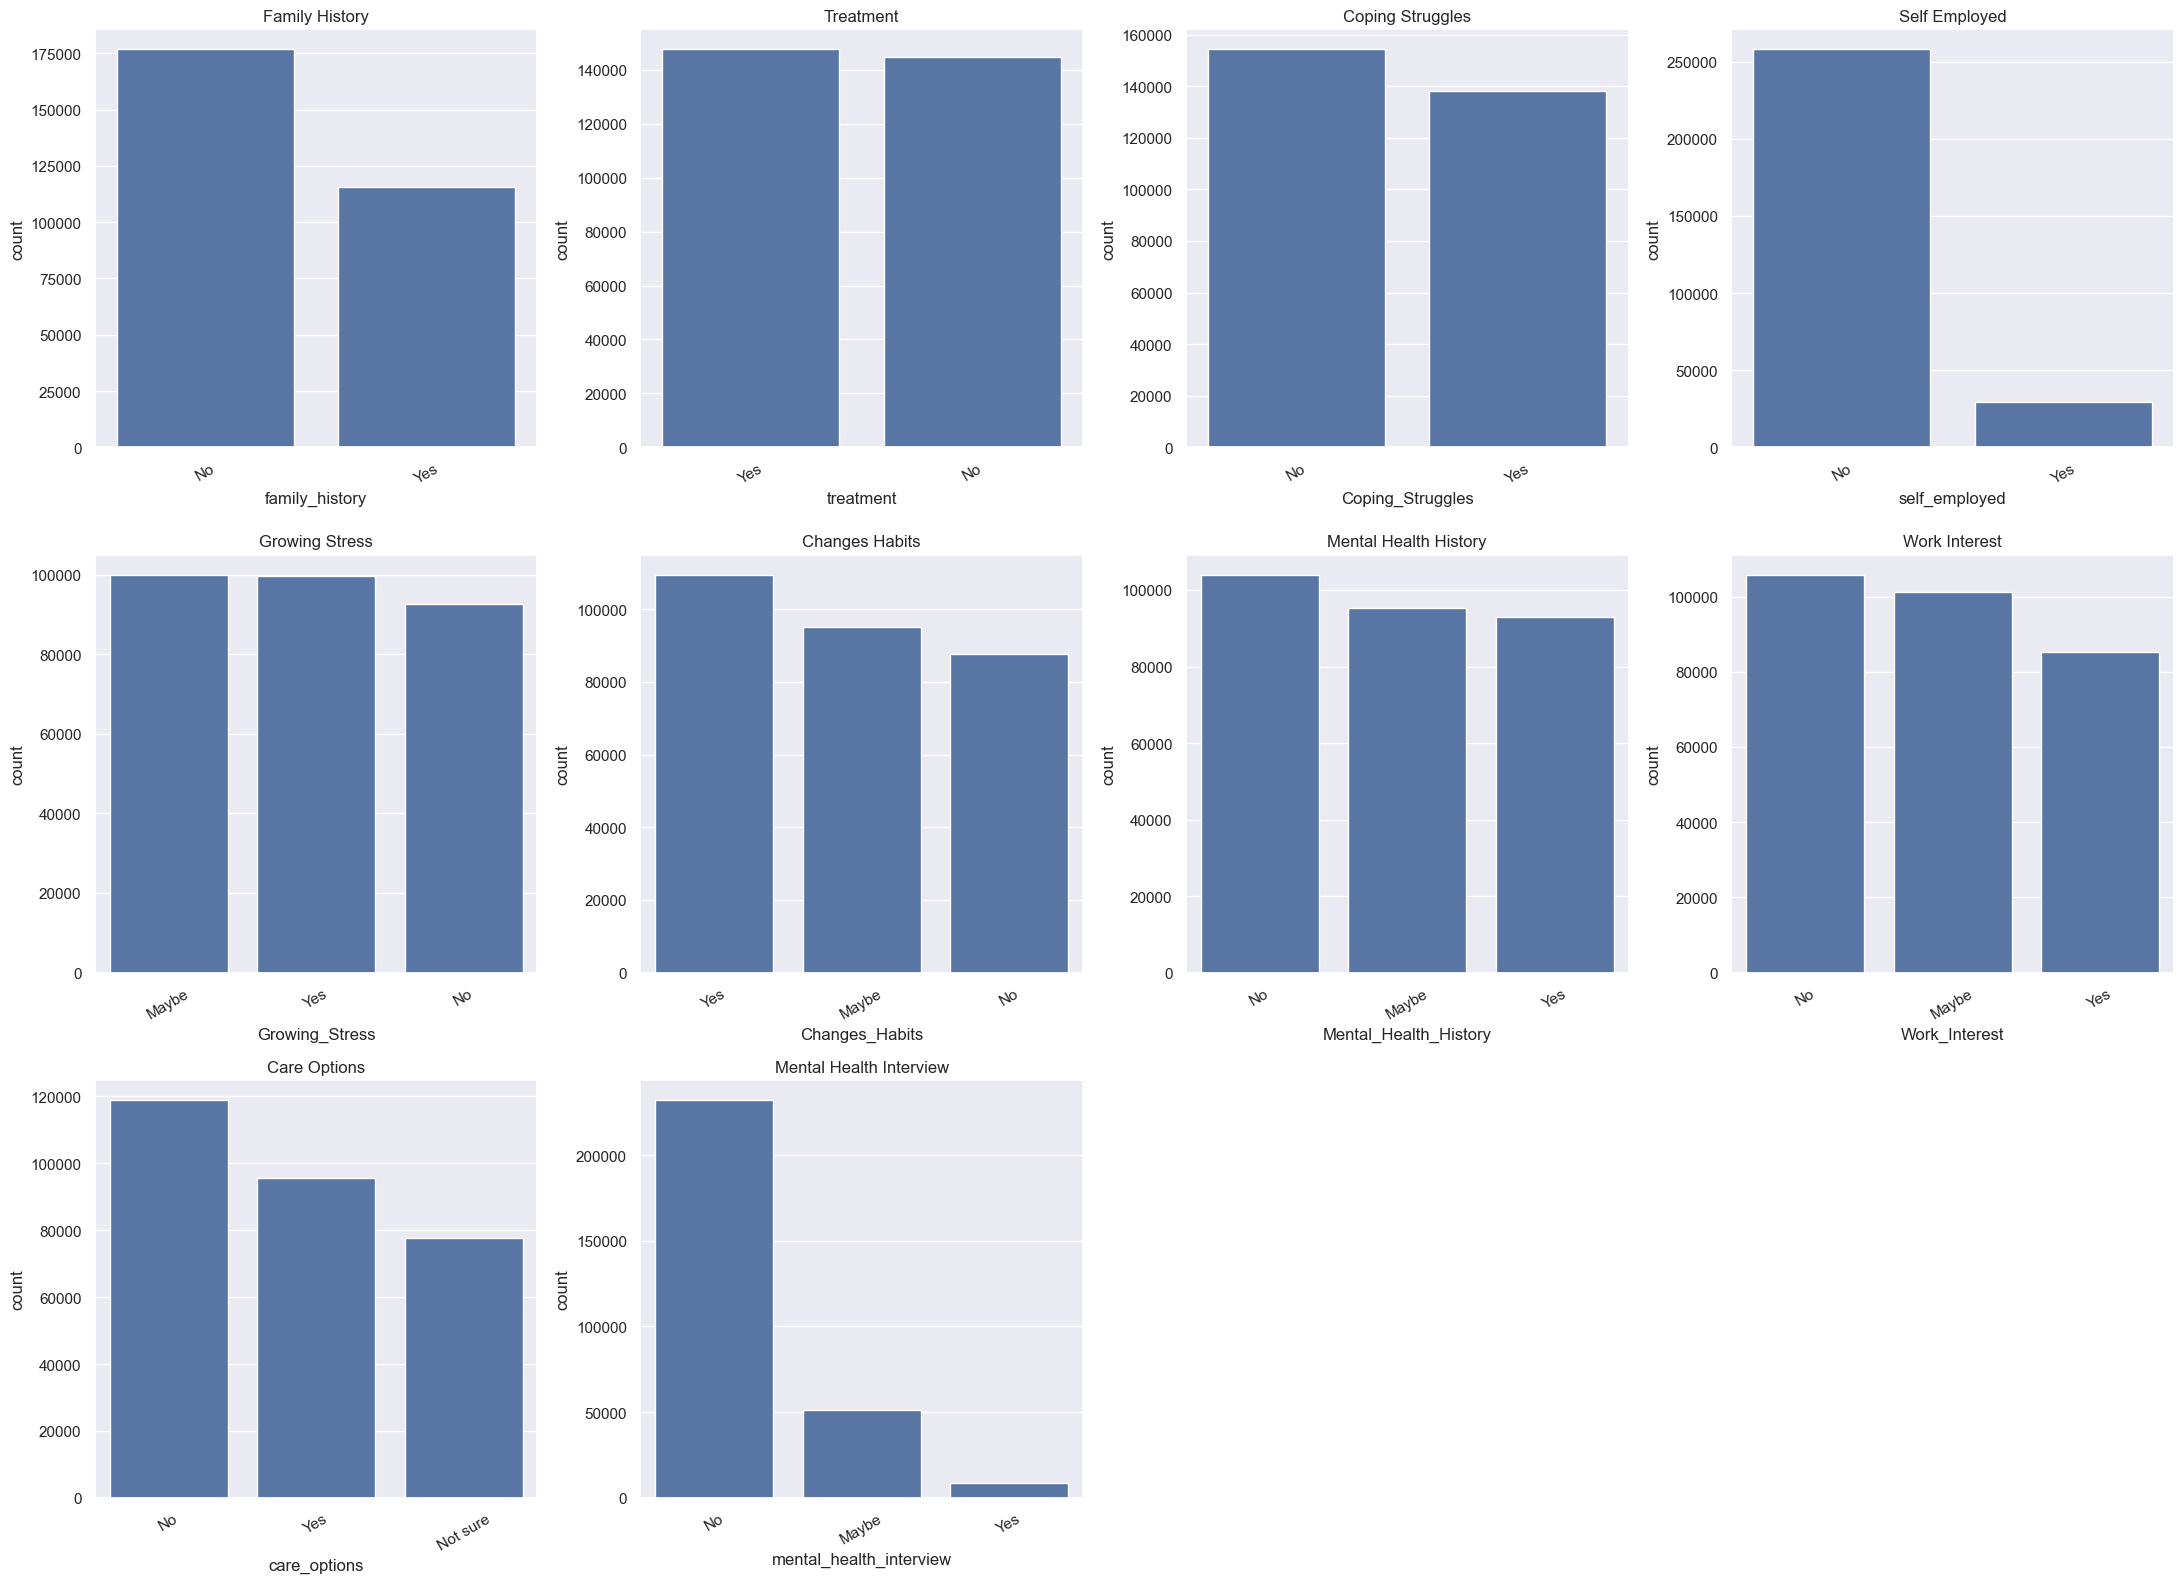

In [23]:
plt.figure(figsize=(22, 16))

for i, col in enumerate(binary_cols + ternary_cols, 1):
    plt.subplot(3, 4, i)
    sns.countplot(
        x=col,
        data=data,
        order=data[col].value_counts().index
    )
    plt.title(col.replace('_', ' ').title())
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()


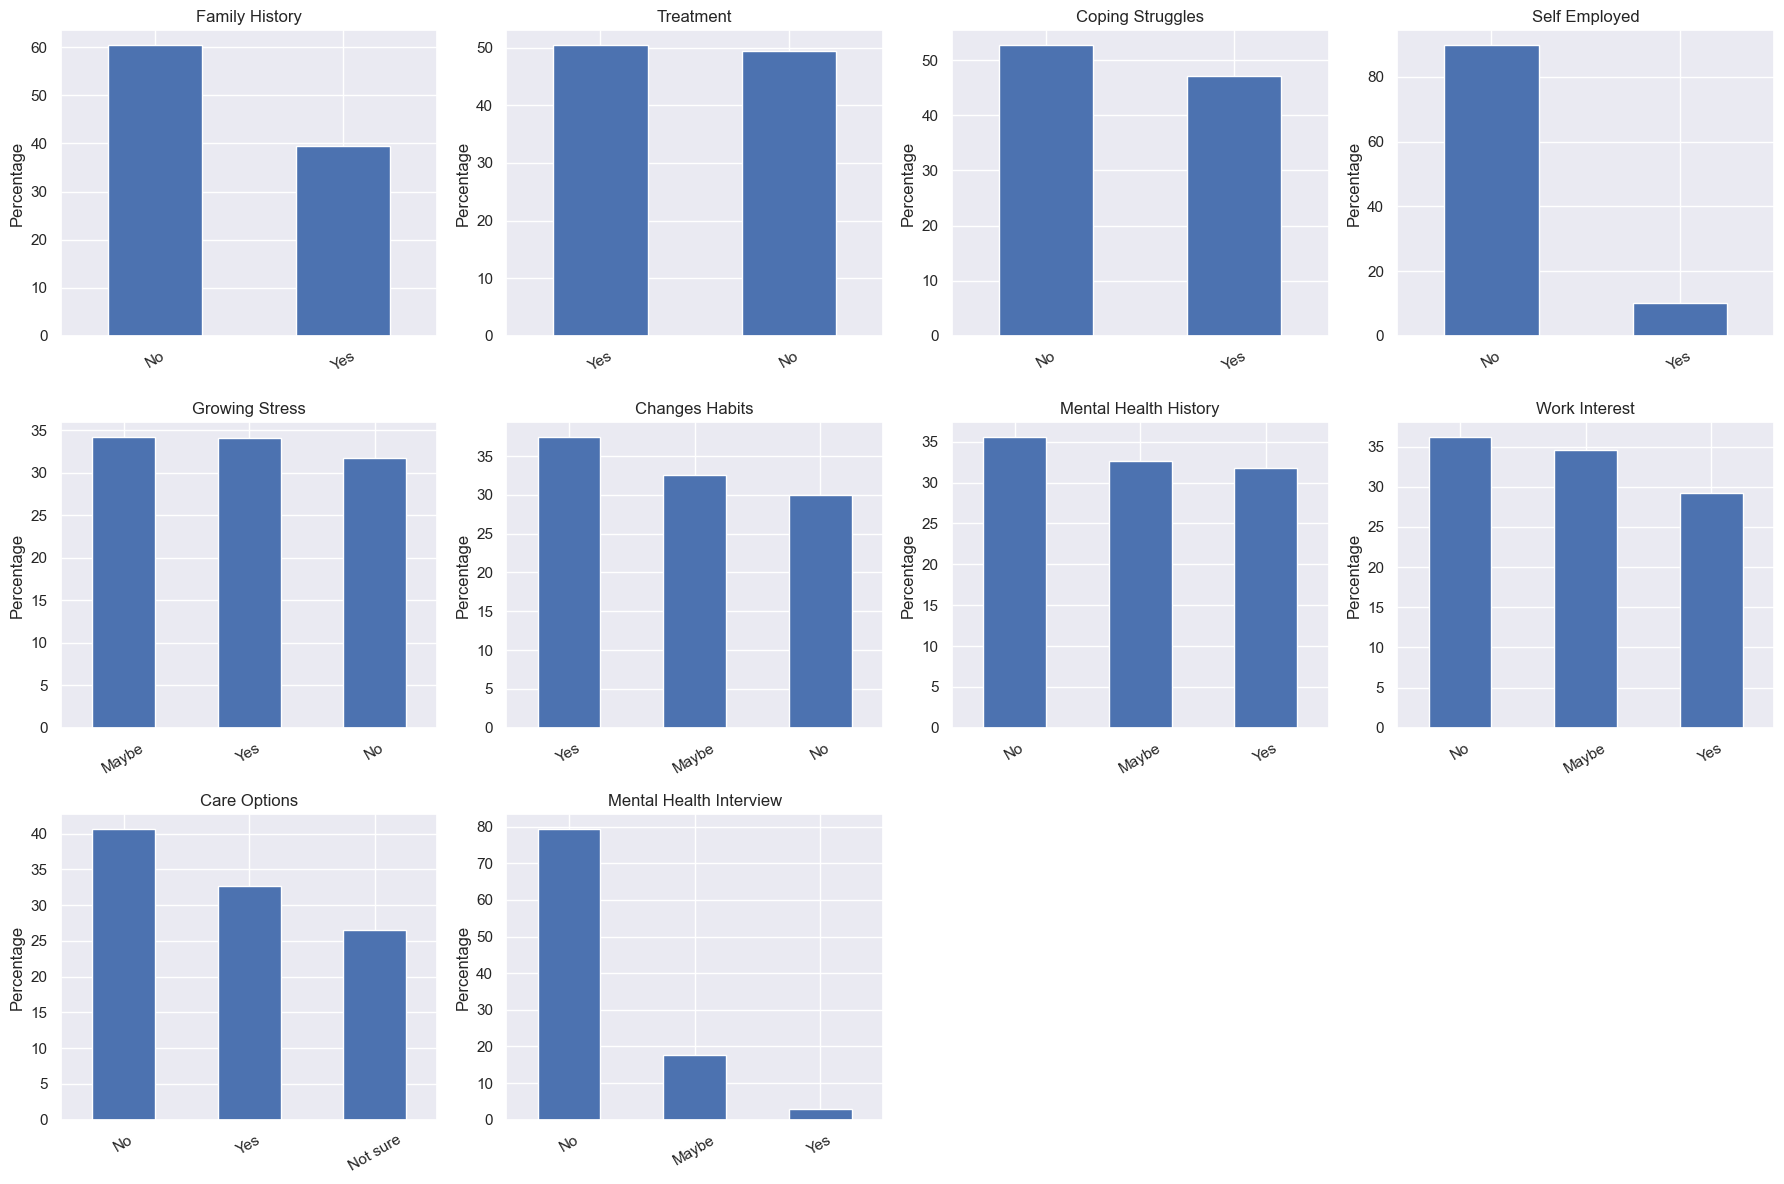

In [24]:
import math

cols = binary_cols + ternary_cols
n_cols = 4  # number of plots per row
n_rows = math.ceil(len(cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()

for ax, col in zip(axes, cols):
    counts = data[col].value_counts(normalize=True) * 100
    counts.plot(kind='bar', ax=ax)
    ax.set_title(col.replace('_', ' ').title())
    ax.set_ylabel('Percentage')
    ax.set_xlabel('')
    ax.tick_params(axis='x', rotation=30)

# Remove empty subplots (if any)
for ax in axes[len(cols):]:
    ax.remove()

plt.tight_layout()
plt.show()


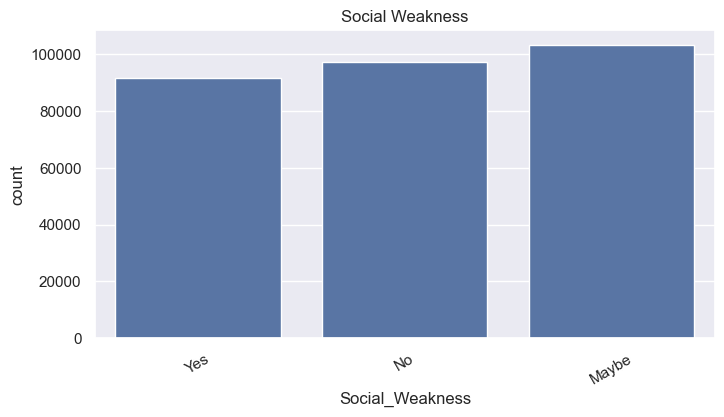

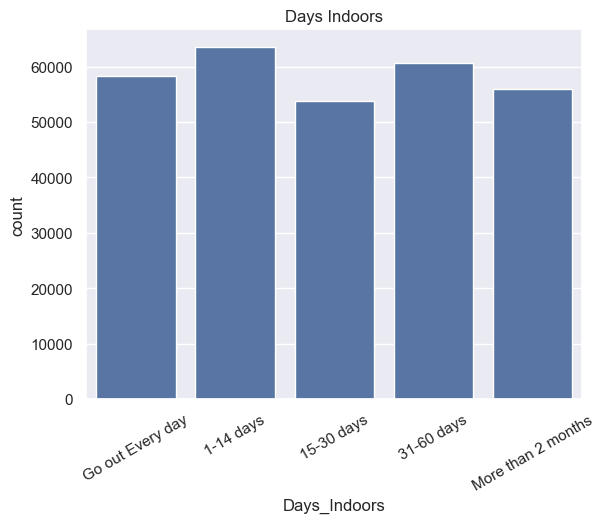

In [25]:
plt.figure(figsize=(8, 4))

for col, order in ordinal_cols.items():
    sns.countplot(
        x=col,
        data=data,
        order=order
    )
    plt.title(col.replace('_', ' ').title())
    plt.xticks(rotation=30)
    plt.show()